<a href="https://colab.research.google.com/github/jnhood/helloAI/blob/main/gan_pytorch2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [2]:
# mount google drive here
#!pip uninstall torch_xla
!pip install -i "https://pip.repos.neuron.amazonaws.com" torch_xla

Looking in indexes: https://pip.repos.neuron.amazonaws.com, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 267.6/267.6 MB 4.3 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 MB 4.2 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 266.3/266.3 MB 4.7 MB/s eta 0:00:00
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 254.8/254.8 MB 4.5 MB/s eta 0:00:00
ERROR: Cannot install torch-xla==1.12.0+torchneuron3, torch-xla==1.13.0+torchneuron3, torch-xla==1.13.0+torchneuron4 and torch-xla==1.13.0+torchneuron5 because these package versions have conflicting dependencies.

The conflict is caused by:
    torch-xla 1.13.0+torchneuron5 depends on cloud-tpu-client>=0.10.0
    torch-xla 1.13.0+torchneuron4 depends on cloud-tpu-client>=0.10.0
    torch-xla 1.13.0+torchneuron3 depends on cloud-tpu-client>=0.10.0
    torch-xla 1.12.0+torchneuron3 depends on cloud-tpu-client>=0.10.0

To fix this you could try to:
1. loosen

In [1]:
# create and train a pytorch digit classifier
# source: chatgpt with the prompt "create a pytorch mnist digit classifier"
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms

# Set a flag to indicate whether we are (re)-training the model
# or loading an already trained model
PATH = "/content/drive/MyDrive/models/classifier.pt"
loadmodel = False

# Set device to either CUDA or CPU
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")

# Define the neural network architecture
class Net(nn.Module):
    def __init__(self):
        super(Net, self).__init__()
        self.conv1 = nn.Conv2d(1, 10, kernel_size=5)
        self.conv2 = nn.Conv2d(10, 20, kernel_size=5)
        self.dropout = nn.Dropout2d()
        self.fc1 = nn.Linear(320, 50)
        self.fc2 = nn.Linear(50, 10)

    def forward(self, x):
        x = nn.functional.relu(nn.functional.max_pool2d(self.conv1(x), 2))
        x = nn.functional.relu(nn.functional.max_pool2d(self.dropout(self.conv2(x)), 2))
        x = x.view(-1, 320)
        x = nn.functional.relu(self.fc1(x))
        x = self.fc2(x)
        return nn.functional.log_softmax(x, dim=1)

if loadmodel:
  model = Net()
  model.load_state_dict(torch.load(PATH))
  model = model.to(device)
  model.eval()

else:
  # Create an instance of the model and send it to the device
  model = Net().to(device)

  # Load the MNIST dataset and apply transformations
  transform = transforms.Compose([
      transforms.ToTensor(),
      transforms.Normalize((0.1307,), (0.3081,))
  ])

  train_set = datasets.MNIST('../data', train=True, download=True, transform=transform)
  test_set = datasets.MNIST('../data', train=False, download=True, transform=transform)

  # Set batch size and create data loaders
  batch_size = 64

  train_loader = torch.utils.data.DataLoader(train_set, batch_size=batch_size, shuffle=True)
  test_loader = torch.utils.data.DataLoader(test_set, batch_size=batch_size, shuffle=False)


  # Define the optimizer and loss function
  optimizer = optim.SGD(model.parameters(), lr=0.01, momentum=0.5)
  criterion = nn.CrossEntropyLoss()

  # Train the model
  num_epochs = 10

  for epoch in range(num_epochs):
      model.train()
      for batch_idx, (data, target) in enumerate(train_loader):
          data, target = data.to(device), target.to(device)
          optimizer.zero_grad()
          output = model(data)
          loss = criterion(output, target)
          loss.backward()
          optimizer.step()
          if batch_idx % 100 == 0:
              print('Train Epoch: {} [{}/{} ({:.0f}%)]\tLoss: {:.6f}'.format(
                  epoch, batch_idx * len(data), len(train_loader.dataset),
                  100. * batch_idx / len(train_loader), loss.item()))

      model.eval()
      test_loss = 0
      correct = 0
      with torch.no_grad():
          for data, target in test_loader:
              data, target = data.to(device), target.to(device)
              output = model(data)
              test_loss += criterion(output, target).item()
              pred = output.argmax(dim=1, keepdim=True)
              correct += pred.eq(target.view_as(pred)).sum().item()

      test_loss /= len(test_loader.dataset)
      print('Test set: Average loss: {:.4f}, Accuracy: {}/{} ({:.0f}%)\n'.format(
          test_loss, correct, len(test_loader.dataset),
          100. * correct / len(test_loader.dataset)))    
  torch.save(model.state_dict(), PATH)


100%|██████████| 9912422/9912422 [00:00<00:00, 379357737.53it/s]

Extracting ../data/MNIST/raw/train-images-idx3-ubyte.gz to ../data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 108544528.52it/s]


Extracting ../data/MNIST/raw/train-labels-idx1-ubyte.gz to ../data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 186482537.79it/s]

Extracting ../data/MNIST/raw/t10k-images-idx3-ubyte.gz to ../data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 13003773.90it/s]


Extracting ../data/MNIST/raw/t10k-labels-idx1-ubyte.gz to ../data/MNIST/raw

Train Epoch: 0 [0/60000 (0%)]	Loss: 2.263202
Train Epoch: 0 [6400/60000 (11%)]	Loss: 1.242186
Train Epoch: 0 [12800/60000 (21%)]	Loss: 0.809583
Train Epoch: 0 [19200/60000 (32%)]	Loss: 0.443325
Train Epoch: 0 [25600/60000 (43%)]	Loss: 0.507417
Train Epoch: 0 [32000/60000 (53%)]	Loss: 0.312549
Train Epoch: 0 [38400/60000 (64%)]	Loss: 0.267609
Train Epoch: 0 [44800/60000 (75%)]	Loss: 0.283449
Train Epoch: 0 [51200/60000 (85%)]	Loss: 0.249202
Train Epoch: 0 [57600/60000 (96%)]	Loss: 0.274998
Test set: Average loss: 0.0025, Accuracy: 9518/10000 (95%)

Train Epoch: 1 [0/60000 (0%)]	Loss: 0.285510
Train Epoch: 1 [6400/60000 (11%)]	Loss: 0.151939
Train Epoch: 1 [12800/60000 (21%)]	Loss: 0.109787
Train Epoch: 1 [19200/60000 (32%)]	Loss: 0.136439
Train Epoch: 1 [25600/60000 (43%)]	Loss: 0.210644
Train Epoch: 1 [32000/60000 (53%)]	Loss: 0.321214
Train Epoch: 1 [38400/60000 (64%)]	Loss: 0.179676
Train Epoch: 1 [44800/600

RuntimeError: ignored

100%|██████████| 9912422/9912422 [00:00<00:00, 343956246.07it/s]

Extracting data/MNIST/raw/train-images-idx3-ubyte.gz to data/MNIST/raw


100%|██████████| 28881/28881 [00:00<00:00, 102138021.77it/s]


Extracting data/MNIST/raw/train-labels-idx1-ubyte.gz to data/MNIST/raw



100%|██████████| 1648877/1648877 [00:00<00:00, 101774629.47it/s]


Extracting data/MNIST/raw/t10k-images-idx3-ubyte.gz to data/MNIST/raw



100%|██████████| 4542/4542 [00:00<00:00, 19301447.59it/s]


Extracting data/MNIST/raw/t10k-labels-idx1-ubyte.gz to data/MNIST/raw

Epoch [1/100] Batch [1/469] Discriminator Loss: 1.4143 Generator Loss: 0.7032
Epoch [1/100] Batch [101/469] Discriminator Loss: 0.3320 Generator Loss: 1.7633
Epoch [1/100] Batch [201/469] Discriminator Loss: 0.6210 Generator Loss: 1.9536
Epoch [1/100] Batch [301/469] Discriminator Loss: 1.0394 Generator Loss: 1.0028
Epoch [1/100] Batch [401/469] Discriminator Loss: 1.1193 Generator Loss: 0.6705


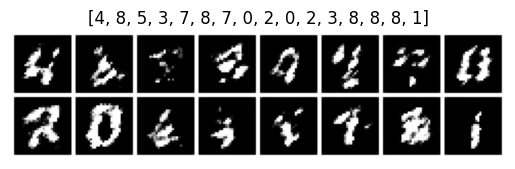

AttributeError: ignored

In [2]:
#OK now we have a good model for analyzing the output from our GAN
import time
import torch
import torch.nn as nn
import torch.optim as optim
from torchvision import datasets, transforms
from torchvision.utils import make_grid
from torch.utils.data import DataLoader
import matplotlib.pyplot as plt

# Set random seed for reproducibility
torch.manual_seed(42)

class Generator(nn.Module):
    def __init__(self):
        super(Generator, self).__init__()

        self.fc = nn.Linear(100, 7 * 7 * 128)
        self.conv1 = nn.ConvTranspose2d(128, 64, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.ConvTranspose2d(64, 1, kernel_size=4, stride=2, padding=1)

        self.relu = nn.ReLU()
        self.tanh = nn.Tanh()

    def forward(self, x):
        x = self.fc(x)
        x = x.view(-1, 128, 7, 7)
        x = self.relu(self.conv1(x))
        x = self.tanh(self.conv2(x))
        return x

# Define the discriminator network
class Discriminator(nn.Module):
    def __init__(self):
        super(Discriminator, self).__init__()

        self.conv1 = nn.Conv2d(1, 64, kernel_size=4, stride=2, padding=1)
        self.conv2 = nn.Conv2d(64, 128, kernel_size=4, stride=2, padding=1)
        self.fc = nn.Linear(7 * 7 * 128, 1)

        self.relu = nn.LeakyReLU(0.2)
        self.sigmoid = nn.Sigmoid()

    def forward(self, x):
        x = self.relu(self.conv1(x))
        x = self.relu(self.conv2(x))
        x = x.view(-1, 7 * 7 * 128)
        x = self.sigmoid(self.fc(x))
        return x

# Instantiate the generator and discriminator networks
generator = Generator()
discriminator = Discriminator()

# Define the loss function and optimizer
criterion = nn.BCELoss()
generator_optimizer = optim.Adam(generator.parameters(), lr=0.0002, betas=(0.5, 0.999))
discriminator_optimizer = optim.Adam(discriminator.parameters(), lr=0.0002, betas=(0.5, 0.999))

# Load the dataset
transform = transforms.Compose([
    transforms.ToTensor(),
    transforms.Normalize((0.5,), (0.5,))
])
dataset = datasets.MNIST('data', train=True, download=True, transform=transform)
dataloader = DataLoader(dataset, batch_size=128, shuffle=True)

# Define the number of epochs and the device to use
num_epochs = 100
device = torch.device('cuda')

# Move the generator and discriminator networks to the device
generator.to(device)
discriminator.to(device)

# Train the generator and discriminator networks
time_total = 0
d_losses = []
g_losses = []
for epoch in range(num_epochs):
    time_epoch = 0
    start = time.time()
    for i, (real_images, _) in enumerate(dataloader):
        batch_size = real_images.shape[0]
        real_labels = torch.ones(batch_size, 1, device=device)
        fake_labels = torch.zeros(batch_size, 1, device=device)

        # Train the discriminator network
        discriminator_optimizer.zero_grad()
        real_images = real_images.to(device)
        real_outputs = discriminator(real_images)
        real_loss = criterion(real_outputs, real_labels)

        noise = torch.randn(batch_size, 100, device=device)
        fake_images = generator(noise)
        fake_outputs = discriminator(fake_images.detach())
        fake_loss = criterion(fake_outputs, fake_labels)

        discriminator_loss = real_loss + fake_loss
        discriminator_loss.backward()
        discriminator_optimizer.step()

        # Train the generator network
        generator_optimizer.zero_grad()
        noise = torch.randn(batch_size, 100, device=device)
        fake_images = generator(noise)
        fake_outputs = discriminator(fake_images)
        generator_loss = criterion(fake_outputs, real_labels)
        generator_loss.backward()
        generator_optimizer.step()

        # Print the loss statistics
        if i % 100 == 0:
            print(f'Epoch [{epoch+1}/{num_epochs}] Batch [{i+1}/{len(dataloader)}] '
                  f'Discriminator Loss: {discriminator_loss.item():.4f} '
                  f'Generator Loss: {generator_loss.item():.4f}')

    # Generate 100 samples and count how many of each digit 
    with torch.no_grad():
        # Define the fixed noise vector for generating samples
        sample_noise = torch.randn(100, 100, device=device)
        generated_images = generator(sample_noise)
        generated_images = 0.5 * (generated_images + 1)
        output = model(generated_images)
        pred = output.argmax(dim=1, keepdim=True)
        grid = make_grid(generated_images[:16].cpu(), nrow=8, pad_value=1)
        plt.imshow(grid.permute(1, 2, 0))
        plt.axis('off')
        plt.title([int(pred[x]) for x in range(16)])
        plt.show()
        #print(torch.exp(output[0])) # torch.exp converts the output back into regular softmax probabilities (confidences)
        avg_conf = torch.mean(torch.exp(output).max(dim=1).values)
        counts = [0]*10
        for p in pred:
            counts[p] += 1

    g_losses.append(generator_loss.itme())
    d_losses.append(discriminator_loss.item())
    time_epoch = time.time() - start
    time_total += time_epoch
    print(f"average prediction confidence over 100 predictions: {avg_conf}")
    print(f"prediction counts: {counts}")
    print(f"epoch time: {time_epoch}, total time: {time_total}")
        



In [3]:
import matplotlib.pyplot as plt

fig, ax = plt.figure(figsize=(10,5))
ax.plot(g_losses)
ax.plot(d_losses)
plt.show()

TypeError: ignored

<Figure size 1000x500 with 0 Axes>